In [1]:
# Import Dependencies
from sklearn import datasets
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

## HR Employee Attrition
Keywords: multivariate, classification.

## Description
This dataset is used to evaluae what features lead to employee attrition. This is a fictional data set that was created by IBM data scientists to reflect real world data.

## Source
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv("../Resources/HREmployeeAttrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Select our independent X variables, and our dependent y variable. 
X = df.drop(columns = ['Attrition'])
y = df['Attrition']

In [5]:
# Confirm imblance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition
print(y.value_counts())
print(y.value_counts(normalize=True))

Total Counts:
0    1233
1     237
Name: Attrition, dtype: int64

Percentage:
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


### Imbalanced

In [6]:
# Create Validation training and testing datasets without balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [9]:
# Confirm imblance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition
print(y.value_counts())
print(y.value_counts(normalize=True))

Total Counts
0    1233
1     237
Name: Attrition, dtype: int64
Percentage
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


In [10]:
# Create a Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [11]:
# Train the model using the training datasets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [12]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

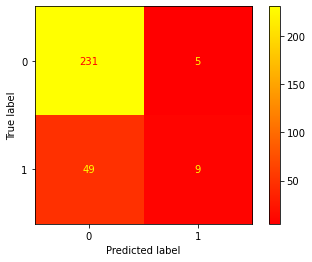

In [14]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.autumn)

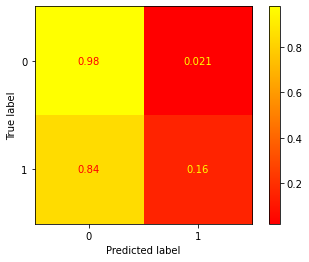

In [15]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.autumn, normalize='true')

In [16]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=["Attrition", "No Attrition"]))

              precision    recall  f1-score   support

   Attrition       0.82      0.98      0.90       236
No Attrition       0.64      0.16      0.25        58

    accuracy                           0.82       294
   macro avg       0.73      0.57      0.57       294
weighted avg       0.79      0.82      0.77       294



### Balanced

In [17]:
# Create our Validation training and testing datasets with balancing.
B = df[df['Attrition'] == 0].iloc[:47]
A = df[df['Attrition'] == 1].iloc[:47]
x = pd.concat([A, B], ignore_index=True)
X = x.drop(columns = ['Attrition'])
y = x['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [18]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

1    10
0     9
Name: Attrition, dtype: int64
1    0.526316
0    0.473684
Name: Attrition, dtype: float64


In [19]:
# Create the Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [20]:
# Train the model using the training sets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [21]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

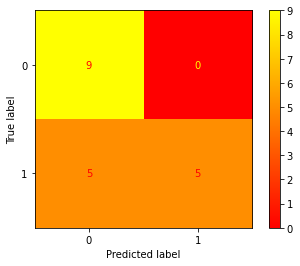

In [22]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.autumn)

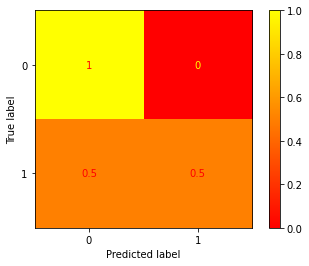

In [23]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.autumn, normalize='true')

In [24]:
# Print classification report
print(classification_report(y_test, y_pred,target_names=["Attrition", "No Attrition"]))

              precision    recall  f1-score   support

   Attrition       0.64      1.00      0.78         9
No Attrition       1.00      0.50      0.67        10

    accuracy                           0.74        19
   macro avg       0.82      0.75      0.72        19
weighted avg       0.83      0.74      0.72        19

